1 [1.98705843 1.97391815 1.96058047 1.94704674 1.93331831 1.91939654
 1.90528284 1.8909786  1.87648527 1.86180429 1.84693713 1.83188527
 1.81665023 1.80123352 1.78563669 1.7698613  1.75390891 1.73778114
 1.72147959 1.70500589 1.68836169 1.67154866 1.65456847 1.63742282
 1.62011343 1.60264203 1.58501037 1.5672202  1.54927331 1.5311715
 1.51291657 1.49451034 1.47595467 1.4572514  1.4384024  1.41940957
 1.40027479 1.38099998 1.36158708 1.34203802 1.32235475 1.30253925
 1.28259349 1.26251948 1.24231921 1.22199471 1.20154801 1.18098116
 1.16029621 1.13949522 1.11858029 1.0975535  1.07641696 1.05517277
 1.03382307 1.01236999 0.99081566 0.96916226 0.94741194 0.92556688
 0.90362926 0.88160128 0.85948514 0.83728305 0.81499723 0.79262991
 0.77018333 0.74765973 0.72506136 0.70239049 0.67964938 0.65684031
 0.63396555 0.61102739 0.58802813 0.56497007 0.54185551 0.51868677
 0.49546616 0.472196   0.44887862 0.42551635 0.40211153 0.37866651
 0.35518361 0.33166519 0.30811361 0.28453122 0.26092038 0.237

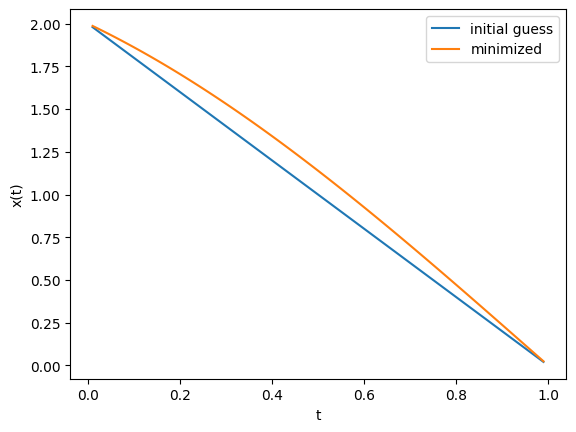

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def params():
    nvar = 99; m = 1. # We have 99 middle points, 1,2,...,99
    xini, xfin = 2., 0. # end points are fixed at 2 and 0
    tt = 1.; dt = tt/(nvar+1) # total time 1
    return nvar, m, xini, xfin, dt

def fod(der,x):
    return -x if der==0 else np.array([-1] * nvar)

def gradient(xs):
    nvar, m, xini, xfin, dt = params()
    arr = np.zeros(nvar)
    arr[0] = (m/dt)*(2*xs[0]-xini-xs[1]) + dt * fod(0,xs[0])
    arr[1:-1] = (m/dt)*(2*xs[1:-1] - xs[:-2] - xs[2:]) + dt*fod(0,xs[1:-1])
    arr[-1] = (m/dt)*(2*xs[-1]-xs[-2]-xfin) +dt * fod(0,xs[-1])
    return arr

def hessian(xs):
    nvar, m, xini, xfin, dt = params()
    he = np.diag(2*m/dt+ dt*fod(1,xs))
    np.fill_diagonal(he[1:,:], -m/dt)
    np.fill_diagonal(he[:,1:], -m/dt)
    return he

def multi_newton(gradient,hessian,xolds,kmax=200,tol=1.e-8):
    for k in range(1,kmax):
        grad_xolds = gradient(xolds)
        he_xolds = hessian(xolds)
        xnews = xolds + gauelim_pivot(he_xolds, -grad_xolds)
        err = termcrit(xolds,xnews)
        print(k, xnews, err)
        if err < tol:
            break
        xolds = np.copy(xnews)
    else:
        xnews = None
    return xnews


def gauelim_pivot(inA,inbs):
    A = np.copy(inA)
    bs = np.copy(inbs)
    n = bs.size

    for j in range(n-1):
        k = np.argmax(np.abs(A[j:,j])) + j
        if k != j:
            A[j,:], A[k,:] = A[k,:], A[j,:].copy()
            bs[j], bs[k] = bs[k], bs[j]

        for i in range(j+1,n):
            coeff = A[i,j]/A[j,j]
            A[i,j:] -= coeff*A[j,j:]
            bs[i] -= coeff*bs[j]

    xs = backsub(A,bs)
    return xs

def backsub(U,bs):
    n = bs.size
    xs = np.zeros(n)
    for i in reversed(range(n)):
        xs[i] = (bs[i] - U[i,i+1:]@xs[i+1:])/U[i,i]
    return xs

def termcrit(xolds,xnews):
    errs = np.abs((xnews - xolds)/xnews)
    return np.sum(errs)


if __name__ == '__main__':
    nvar, m, xini, xfin, dt = params()
    xolds = np.linspace(2,0,nvar+2)[1:-1]
    xnews = multi_newton(gradient, hessian, xolds); print(xnews)
    tlist = np.linspace(0,1,nvar+2)
    plt.plot(tlist[1:-1],xolds,label='initial guess')
    plt.plot(tlist[1:-1],xnews, label='minimized')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('x(t)')